In [1]:
import pandas as pd
lcn = pd.read_csv("E:\DATA scientist\R\Lungcap\LungCapData.csv")
lcn.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [2]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [3]:
lcn.Gender = lcn.Gender.replace({"male": 1 , "female": 0 })
lcn.Caesarean = lcn.Caesarean.replace({"no": 1 , "yes": 0 })
lcn.Smoke = lcn.Smoke.replace({"yes": 1 , "no": 0 })

In [4]:
lcn.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,1
1,10.125,18,74.7,1,0,1
2,9.550,16,69.7,0,0,0
3,11.125,14,71.0,0,1,1
4,4.800,5,56.9,0,1,1


In [5]:
from sklearn.model_selection import train_test_split
lcn_train , lcn_test = train_test_split(lcn, test_size = 0.2)

In [6]:
lcn_x_train = lcn_train.iloc[:,[1,2,3,4]]
lcn_y_train = lcn_train.iloc[:,0]

In [7]:
lcn_x_test = lcn_test.iloc[:,[1,2,3,4]]
lcn_y_test = lcn_test.iloc[:,0]

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(lcn_x_train, lcn_y_train)

LinearRegression()

In [9]:
pred_value =  reg.predict(lcn_x_test)

In [10]:
reg.coef_

array([ 0.14582813,  0.26947601, -0.60158824,  0.3530446 ])

In [11]:
Rsqr = reg.score(lcn_x_train,lcn_y_train)
Rsqr

0.8549529629762354

In [12]:
pred_train = reg.predict(lcn_x_train)
error_train = pred_train - lcn_y_train
N = lcn_x_train.shape[0]
K = lcn_x_train.shape[1]
Adj_Rsqr = 1 - (1-Rsqr)*( N-1)/(N-K-1)
Adj_Rsqr

0.8539439401099831

In [13]:
error = pred_value - lcn_y_test
import numpy as np
MSE =np.mean(np.square(error))
MAE = np.mean(np.abs(error))
MAPE = np.mean(np.abs(error * 100/ lcn_y_test))
Acc = 100 - MAPE

In [14]:
print(" MSE is ", MSE,
      "MAE is ", MAE, "MAPE is", MAPE, "Accuracy is ", Acc )

 MSE is  1.1577873998324344 MAE is  0.8643659189133349 MAPE is 16.097320500260103 Accuracy is  83.90267949973989


In [15]:
RMSE = np.sqrt(MSE)
RMSE

1.0760052973068648

In [16]:
# Assumptions: mean of the error terms (train ) should be 0 

In [17]:
pred_train = reg.predict(lcn_x_train)
error_train = pred_train - lcn_y_train

In [18]:
np.mean(error_train)

-1.483104826688916e-15

In [19]:
import matplotlib.pyplot as plt

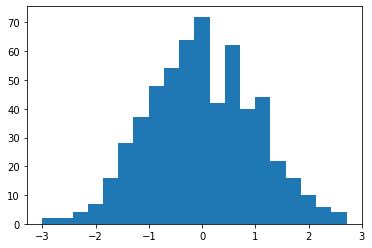

In [20]:
plt.hist(error_train, bins = 20);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


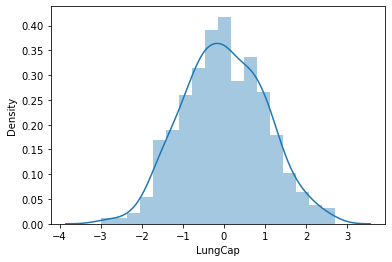

In [21]:
import seaborn as sns
sns.distplot(error_train);

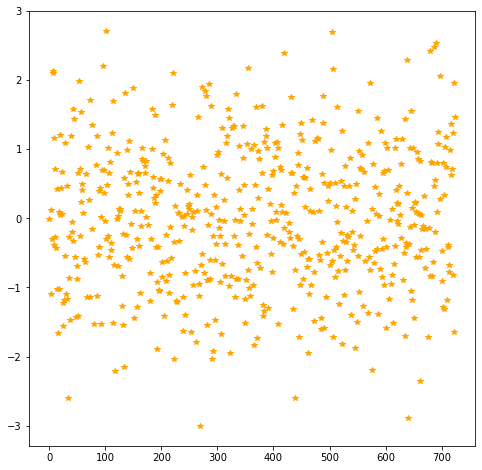

In [22]:
plt.figure(figsize =(8,8))
plt.plot(error_train, "*", color = "orange");

In [23]:

pred_actual = pd.DataFrame({"Predicted" :pred_train  , "Actual" :lcn_y_train})
pred_actual

,Predicted,Actual
591,3.515518,2.250
296,6.115133,6.725
143,13.525238,12.400
679,6.346572,3.925
138,7.444615,6.450
...,...,...
337,10.020494,10.900
529,7.206853,7.050
453,11.044503,10.450
397,9.727668,10.500


<Figure size 1440x1440 with 0 Axes>

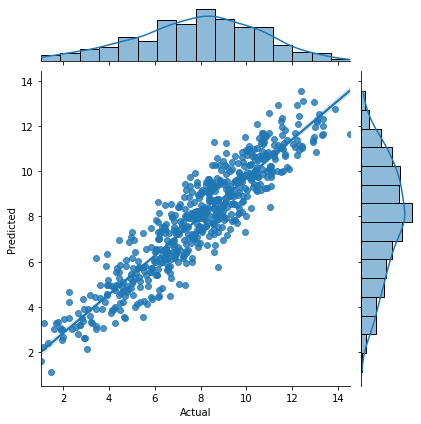

In [24]:
plt.figure(figsize= (20,20))
sns.jointplot(x  = 'Actual' , y= 'Predicted' , kind = "reg", data = pred_actual);


In [25]:
git init

SyntaxError: invalid syntax (<ipython-input-25-f188d5ac1197>, line 1)